In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lotto = pd.read_csv('/home/daniel/code_space/Data-SCI-basic/csv/excel.csv')
pd.options.display.float_format = '{:,.0f}'.format
# pd.set_option('display.max_rows', None)

In [2]:
lotto_sell=np.array(2*(lotto['get_3']*lotto['num_3']*8+(lotto['get_4']*lotto['num_4']+lotto['get_5']*lotto['num_5'])))
lotto_sell=np.concatenate((lotto_sell[:1006]/1000,lotto_sell[1006:]/2000))
lotto=lotto.assign(sell=lotto_sell)
# lotto_sell
lotto

,num,day,num_1,get_1,num_2,get_2,num_3,get_3,num_4,get_4,num_5,get_5,1,2,3,4,5,6,B,sell
0,1091,2023.10.28,9,2898470459,65,66887780,2873,1513299,149578,50000,2481449,5000,6,20,23,24,28,30,44,"109,335,618"
1,1090,2023.10.21,11,2386494614,88,49718638,2931,1492747,143714,50000,2398962,5000,12,19,21,29,40,45,1,"108,364,883"
2,1089,2023.10.14,9,2978522167,79,56554219,2825,1581517,138575,50000,2338390,5000,4,18,31,37,42,43,40,"108,725,968"
3,1088,2023.10.07,11,2434697898,94,47485243,2991,1492348,141487,50000,2352280,5000,11,21,22,30,39,44,31,"109,089,306"
4,1087,2023.09.30,16,1732253602,71,65061169,2989,1545448,149854,50000,2506601,5000,13,14,18,21,34,44,16,"113,960,915"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,5,2003.01.04,0,0,0,0,42,6033800,3043,166500,60434,10000,16,24,29,40,41,42,3,"3,138,356"
1087,4,2002.12.28,0,0,1,211191200,29,7282400,2777,152100,52382,10000,14,27,30,31,40,42,2,"2,635,718"
1088,3,2002.12.21,1,2000000000,0,0,139,1174100,5940,54900,73256,10000,11,16,19,21,27,31,30,"2,364,265"
1089,2,2002.12.14,1,2002006800,2,94866800,103,1842000,3763,100800,55480,10000,9,13,21,25,32,42,2,"2,451,918"


<Axes: xlabel='num'>

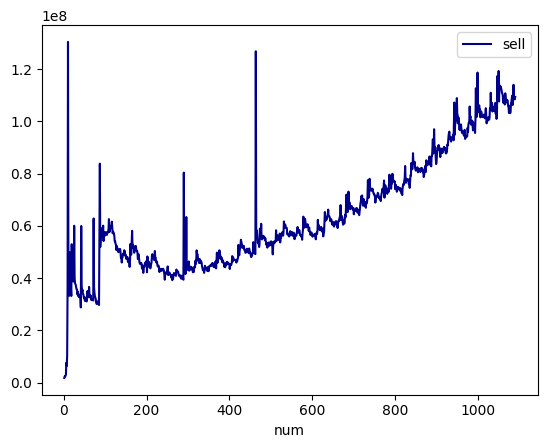

In [3]:
lotto.plot.line(x='num',y='sell',c='DarkBlue')

<Axes: ylabel='Frequency'>

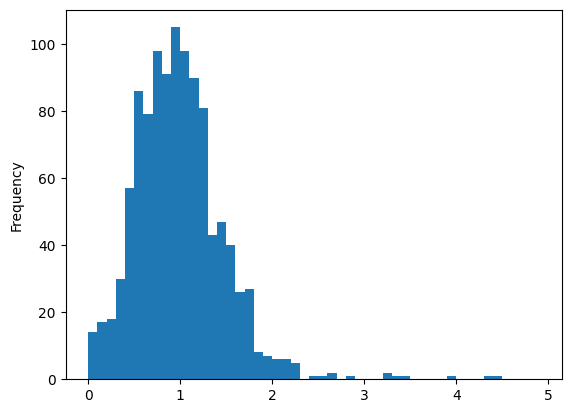

In [4]:
lotto_win=np.array(lotto['num_1']*8145060/lotto['sell'])
lotto=lotto.assign(win=lotto_win)

win_bin=np.arange(0,5,0.1)

lotto['win'].plot.hist(bins = win_bin)

In [5]:

def sim_lotto():
    sim_lotto_arr=np.random.randint(1,46,6)
    sim_lotto_arr.sort()
    return sim_lotto_arr

def pick_lotto():
    i=0
    sim_lotto_arr=sim_lotto()
    pick_lotto_arr=np.random.randint(1,46,6)
    while pick_lotto_arr!=sim_lotto_arr:
        pick_lotto_arr=np.random.randint(1,46,6)
        pick_lotto_arr.sort()
        i+=1
    return i/8145060

def sim_win(n):
    win_count=np.array([])
    for i in range(n):
        win_count=np.append(win_count,pick_lotto())
    win_count_bin=np.arange(0,5,0.1)
    win_count_bin.hist(bins = win_count_bin)

sim_win(1000)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()